In [53]:
# Import Modules
import math
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from warnings import catch_warnings
from warnings import simplefilter
import scipy.stats as stats

In [54]:
# objective function
def objective(x):
	return (x**2 * math.sin(5 * math.pi * x)**6.0)

In [55]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter('ignore')
        return model.predict(X, return_std=True)

In [56]:
# Expected improvement acquisition function
def acquisition(X, Xpred, model):
    # calculate the best surrgate score found so far
    yhat, _ = surrogate(model, X)
    best = max(yhat)

    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, Xpred)
    # calculate the expected improvement (EI)
    # Clip std to avoid division by zero
    std = np.clip(std, 1e-9, None) # Replace None with a suitable upper bound if needed
    z = (mu - best) / std
    ei = (mu - best) * stats.norm.cdf(z) + std * stats.norm.pdf(z)
    return ei

In [57]:
# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    Xsamples = np.random.random(100)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    
    # calculate the acquisition function for each sample
    scores = acquisition(X, Xsamples, model)
    # locate the index of the largest scores
    ix = np.argmax(scores)
    return Xsamples[ix,0]

In [58]:
# plot real observation vs surrogate function
def plot(X, y, model):
    # scatter plot of imputs
    plt.scatter(X, y)
    # line plot of surragte function acorss domain
    Xpred = np.asarray(np.arange(0,1,0.001))
    Xpred = Xpred.reshape(len(Xpred), 1)
    ypred, _ = surrogate(model, Xpred)
    plt.plot(Xpred, ypred)
    # show the plot
    plt.show()

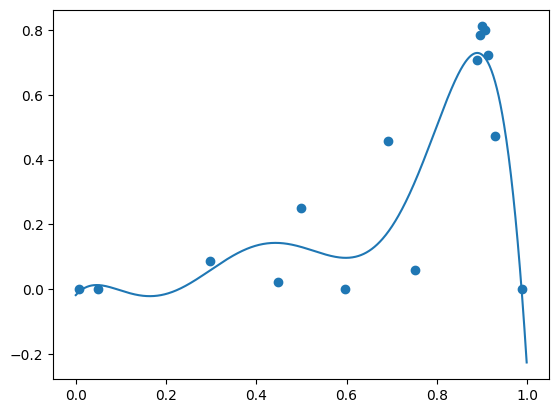

In [215]:
# Sample Data
X = np.asarray([0.5,0.008,0.988,0.449,0.752,0.596,0.928,0.914,0.906,0.901,0.692,0.895,0.049,0.297,0.888])
y = np.asarray([objective(x) for x in X])

# reshape into rows and col
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# define the model
model = GaussianProcessRegressor()
model.fit(X,y)
y_predict= model.predict(X)

plot(X, y, model)

In [216]:
# select the next point ot sample
x = opt_acquisition(X, y, model)

# calculate the actual result
actual = objective(x)

# summarize the finding
est, _ = surrogate(model, [[x]])
print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))


>x=0.888, f()=0.729468, actual=0.713


In [ ]:
x

0.9972883538906274